This notebook prepares the documentation in the user manual on increment-and-fix continuation with apriori step size control.

# Increment-and-Fix Apriori Step Control

As in the previous section, an artificial-parameter homotopy is used with adaptive step size control.

An *apriori step size control algorithm* the predictor determines the step size for the continuation parameter $t$.  It is called apriori because the step size is decided *before* the corrector is applied, in contrast to the aposteriori step control algorithm.

Let us first define the target and start system for the running example.

In [1]:
target = ['x^2 + 4*y^2 - 4;', '2*y^2 - x;']
target

['x^2 + 4*y^2 - 4;', '2*y^2 - x;']

In [2]:
from phcpy.starters import total_degree_start_system

PHCv2.4.88 released 2023-12-26 works!


In [3]:
start, startsols = total_degree_start_system(target)

In [4]:
len(startsols)

4

# 1. let the path trackers run

To run the path trackers in double precision:

In [5]:
from phcpy.curves import double_track

In [6]:
from phcpy.dimension import set_seed
set_seed(2024)

0

In [7]:
gamma, sols = double_track(target, start, startsols)
gamma

(-0.995051052069111-0.09936500277338699j)

By default, ``double_track`` uses a random $\gamma$ and return the generated value.  This value can then be used in a second run.

In [8]:
for (idx, sol) in enumerate(sols):
    print('Solution', idx+1, ':')
    print(sol)

Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.23606797749979E+00   0.00000000000000E+00
 y :  7.86151377757423E-01   0.00000000000000E+00
== err :  9.930E-17 = rco :  1.998E-01 = res :  1.274E-17 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.23606797749979E+00   0.00000000000000E+00
 y : -7.86151377757423E-01   0.00000000000000E+00
== err :  9.930E-17 = rco :  1.998E-01 = res :  1.274E-17 =
Solution 3 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.23606797749979E+00   0.00000000000000E+00
 y :  0.00000000000000E+00   1.27201964951407E+00
== err :  0.000E+00 = rco :  1.079E-01 = res :  0.000E+00 =
Solution 4 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.23606797749979E+00   0.00000000000000E+00
 y :  0.00000000000000E+00  -1.27201964951407E+00
== err :  0.000E+00 = rco :  1.079E-01 = res :  0.000E+00 =


Suppose we would want to recompute the first path in quad double precision.

In [9]:
from phcpy.curves import quad_double_track

Even if we track only one path, the start solution must be given in a list of one element.

In [10]:
gamma, qdsol = quad_double_track(target, start, [startsols[0]])
gamma

(-0.995051052069111-0.09936500277338699j)

In [11]:
print(qdsol[0])

t : 1.0000000000000000000000000000000000000000000000000000000000000000E+00      0.0000000000000000000000000000000000000000000000000000000000000000E+00    
m : 1
the solution for t :
 x : 1.2360679774997896964091736687312762354406183596115257242708972454E+00      6.5642436311782035838428757620506362271925806587869959161667835617E-197   
 y : 7.8615137775742328606955858584295892952312205783772323766490197011E-01      7.7794941850937841850195885945247107364034811096136093162063963605E-198   
== err :  2.654E-67 = rco :  1.998E-01 = res :  4.175E-68 =


Observe that the values for the forward and backward error, the ``err`` and ``res`` respectively, are still rather large for quad double precision.  For this example, we could as well run a couple of extra steps of Newton's method, but suppose that we want to track the paths with much smaller tolerances.

# 2. tuning tolerances of the path trackers

Let us redo the last run, but now with much smaller tolerances on the corrector.

In [12]:
from phcpy.curves import write_parameters
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (-0.995051052069111-0.09936500277338699j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-08
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


In [13]:
from phcpy.curves import set_parameter_value

To set the tolerance for the relative precision for the residuals along the path to ``1.0e-32``, the parameter at position ``9`` has to be set, as follows:

In [14]:
set_parameter_value(9, 1.0e-32)

0

In [15]:
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (-0.995051052069111-0.09936500277338699j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-32
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


Now we rerun the first path once more.

In [16]:
gamma, qdsol = quad_double_track(target, start, [startsols[0]])
gamma

(-0.995051052069111-0.09936500277338699j)

In [17]:
print(qdsol[0])

t : 1.0000000000000000000000000000000000000000000000000000000000000000E+00      0.0000000000000000000000000000000000000000000000000000000000000000E+00    
m : 1
the solution for t :
 x : 1.2360679774997896964091736687312762354406183596115257242708972454E+00      -5.7386297539289851571931574133873760183334861888133361201230324073E-262  
 y : 7.8615137775742328606955858584295892952312205783772323766490197011E-01      9.0738364123547551304527345081571298166307030696790330748996811880E-262   
== err :  2.654E-67 = rco :  1.998E-01 = res :  4.175E-68 =


Observe that the values of ``err`` and ``res`` (forward and backward error respectively) are much smaller than before, very close to the quad double precision.

For the experiments in the next section, the values of the continuation parameters must be reset to their defaults.

In [18]:
from phcpy.curves import set_default_parameters

In [19]:
set_default_parameters()
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (-0.10983921948171692-0.9939493678571596j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-08
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


The first parameter is the ``gamma`` parameter.  Let us fix this parameter as well.

In [20]:
set_parameter_value(1, complex(0.977935486240886, 0.20890711991409452)) 
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (0.977935486240886+0.20890711991409452j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-08
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


# 3. a step-by-step path tracker

When we run a path tracker, or let a path tracker run, then the path tracker has the control of the order of execution.  In a step-by-step path tracker, we can ask the path tracker for the next point of the path, which is useful to plot the points along a path.

In [21]:
from phcpy.curves import initialize_double_artificial_homotopy
from phcpy.curves import set_double_solution, get_double_solution
from phcpy.curves import double_predict_correct
from phcpy.curves import double_t_value, double_closest_pole

In [22]:
initialize_double_artificial_homotopy(target, start)

0

In [23]:
set_double_solution(len(target), startsols[0])

0

In [24]:
double_predict_correct()
pole = double_closest_pole()
pole

(0.15514554922219997, -0.08850786865995859)

In [25]:
tval = double_t_value()
tval

0.089308152284921

In [26]:
nextsol = get_double_solution()
print(nextsol)

t :  8.93081522849210E-02   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.95494997861267E-01   9.17030925125147E-04
 y :  9.95350349513970E-01   9.80921487331958E-04
== err :  8.233E-17 = rco :  9.210E-01 = res :  2.265E-17 =


In [27]:
double_predict_correct()
pole = double_closest_pole()
print('closest pole :', pole)
nextsol = get_double_solution()
print(nextsol)

closest pole : (0.35111736232319435, -0.048143303085946214)
t :  1.89308152284921E-01   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.79230904940275E-01   3.20751244815921E-03
 y :  9.75023847993341E-01   4.94652202413876E-03
== err :  1.146E-16 = rco :  7.493E-01 = res :  8.934E-18 =


In [28]:
from phcpy.solutions import strsol2dict

In [29]:
dictsol = strsol2dict(nextsol)
dictsol['t']

(0.189308152284921+0j)

In the code cell below, the loop continues calling ``get_double_solution`` until the value of the continuation parameter is less than 1.0.  The real part and imaginary part of the gamma constant are fixed for a deterministic run.

In [30]:
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (0.977935486240886+0.20890711991409452j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-08
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


In [31]:
initialize_double_artificial_homotopy(target, start)
set_double_solution(len(target), startsols[0])
tval = 0.0
poles = []
path = [startsols[0]]
while tval < 1.0:
    double_predict_correct()
    pole = double_closest_pole()
    locp = (tval+pole[0], pole[1])
    poles.append(locp)
    nextsol = get_double_solution()
    dictsol = strsol2dict(nextsol)
    tval = dictsol['t'].real
    path.append(nextsol)

In [32]:
for sol in path:
    print(strsol2dict(sol)['x'])

(1+0j)
(0.995494997861267+0.000917030925125147j)
(0.979230904940275+0.00320751244815921j)
(0.967072243680787+0.00258238975580037j)
(0.969688665229834-0.00601218730792353j)
(1.00775870703128-0.016752186008432j)
(1.07530651742827-0.0205585999286002j)
(1.14379875229794-0.0156022327531589j)
(1.19382074878865-0.00821447396701445j)
(1.22145462283616-0.00302771209969062j)
(1.23348940570526-0.000547947192401931j)
(1.23606797749979+0j)


In [33]:
xre = [strsol2dict(sol)['x'].real for sol in path]
xre

[1.0,
 0.995494997861267,
 0.979230904940275,
 0.967072243680787,
 0.969688665229834,
 1.00775870703128,
 1.07530651742827,
 1.14379875229794,
 1.19382074878865,
 1.22145462283616,
 1.23348940570526,
 1.23606797749979]

The imaginary parts of the x-coordinates and the two parts of the y-coordinates are set below.

In [34]:
xim = [strsol2dict(sol)['x'].imag for sol in path]
xim

[0.0,
 0.000917030925125147,
 0.00320751244815921,
 0.00258238975580037,
 -0.00601218730792353,
 -0.016752186008432,
 -0.0205585999286002,
 -0.0156022327531589,
 -0.00821447396701445,
 -0.00302771209969062,
 -0.000547947192401931,
 0.0]

In [35]:
yre = [strsol2dict(sol)['y'].real for sol in path]
yim = [strsol2dict(sol)['y'].imag for sol in path]

Let us plot the coordinates of this first solution path.

In [36]:
import matplotlib.pyplot as plt

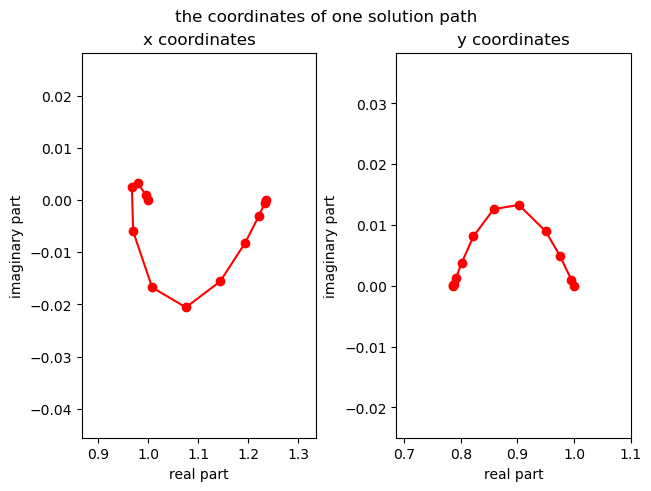

In [37]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle('the coordinates of one solution path')
axs[0].set_title('x coordinates')
axs[0].set_xlabel('real part')
axs[0].set_ylabel('imaginary part')
axs[0].set_xlim(min(xre)-0.1, max(xre)+0.1)
axs[0].set_ylim(min(xim)-0.025, max(xim)+0.025)
dots, = axs[0].plot(xre,xim,'r-')
dots, = axs[0].plot(xre,xim,'ro')
axs[1].set_title('y coordinates')
axs[1].set_xlabel('real part')
axs[1].set_ylabel('imaginary part')
axs[1].set_xlim(min(yre)-0.1, max(yre)+0.1)
axs[1].set_ylim(min(yim)-0.025, max(yim)+0.025)
dots, = axs[1].plot(yre,yim,'r-')
dots, = axs[1].plot(yre,yim,'ro')
plt.savefig('incfixapriorifig1')
plt.show()

Why do the paths in such a simple homotopy curve so much?

Let us look at the plot of the poles.

In [38]:
repoles = [p[0] for p in poles]
impoles = [p[1] for p in poles]

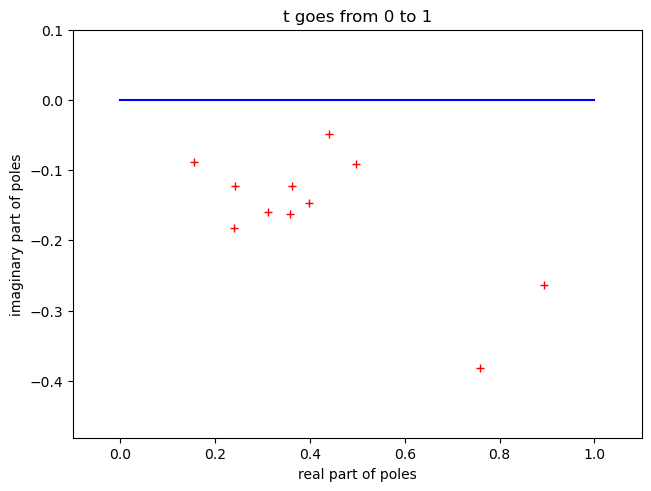

In [39]:
fig, axs = plt.subplots(1, 1, constrained_layout=True)
axs.set_title('t goes from 0 to 1')
axs.set_xlabel('real part of poles')
axs.set_ylabel('imaginary part of poles')
dots, = axs.plot([0.0, 1.0],[0.0, 0.0],'b-')
axs.set_xlim(-0.1, 1.1)
axs.set_ylim(min(min(impoles)-0.1,-0.1), max(max(impoles)+0.1, 0.1))
dots, = axs.plot(repoles,impoles,'r+')
plt.savefig('incfixapriorifig2')
plt.show()

For this plot, the closest poles appear towards the middle of the interval $[0,1]$ where the continuation parameter $t$ lives.